## **Unidad N¬∞ 2 -  Base de datos**:  
###Contenidos:
- Tipos de datos (estructurados y no estructurados) y su tratamiento.
- Limpieza e integraci√≥n de datos. T√©cnicas de curaci√≥n de datos e ingenier√≠a de caracter√≠sticas (feature engineering).
- Estandarizaci√≥n de procesos
- Principios en el manejo de base de datos
- Bases de datos
- Uso de Python. Librer√≠as: pandas, numpy, scipy.



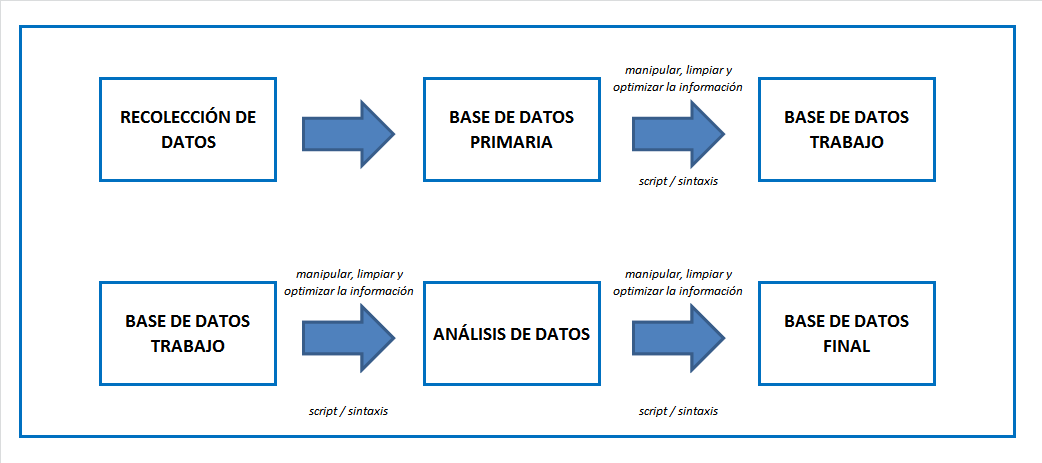

# Manipulando Datos con Pandas (continuaci√≥n...)

<p align="center">
<img
     src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg"
     alt="pypl"
     width=300
     height=>
</p>


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulaci√≥n y an√°lisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando m√°s sem√°ntica y nuevas operaciones.

Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  

In [ ]:
import pandas as pd
## Establecer el formato de los n√∫meros en el DataFrame para que no usen notaci√≥n cient√≠fica
#pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
import numpy as np

## Preparaci√≥n de  los Datos.

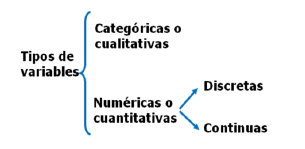

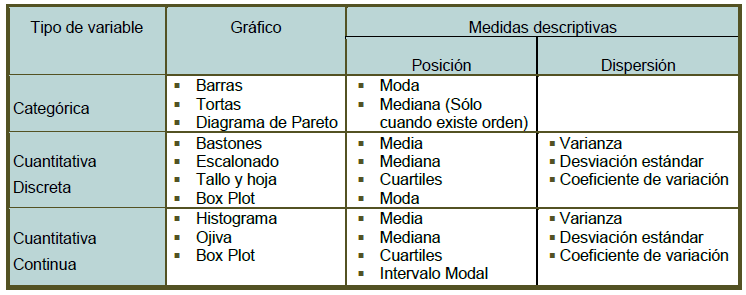

## **B.5.**  Cargar Bases de Datos localizadas en Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



*   Ubico la carpeta en Google Drive
*   Bot√≥n derecho copio la ruta de acceso a la base de datos


In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/08_ ICD con Python /Unidad 2: Base de datos/ahora12_facturacion.tsv", sep="\t") #encoding="latin1" o encoding="ISO-8859-1"  sep=";" sep="\t"

In [ ]:
df5.head()

anio  mes mes-anio     provincia                rubro A12    Facturacion 
0  2019    1   ene-19  BUENOS AIRES                 Anteojos     30,878,823 
1  2019    1   ene-19  BUENOS AIRES    Art√≠culos de Librer√≠a      4,657,723 
2  2019    1   ene-19  BUENOS AIRES               Balnearios      5,839,079 
3  2019    1   ene-19  BUENOS AIRES               Bicicletas     20,645,150 
4  2019    1   ene-19  BUENOS AIRES  Calzado y Marroquiner√≠a    229,075,801

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anio          19588 non-null  int64 
 1   mes           19588 non-null  int64 
 2   mes-anio      19588 non-null  object
 3   provincia     19588 non-null  object
 4   rubro A12     19588 non-null  object
 5   Facturacion   19588 non-null  object
dtypes: int64(2), object(4)
memory usage: 918.3+ KB


In [ ]:
df5.dtypes

anio             int64
mes              int64
mes-anio        object
provincia       object
rubro A12       object
Facturacion     object
dtype: object

**Metodo** "*describe*"

Es un m√©todo de Pandas que genera un resumen estad√≠stico de las columnas num√©ricas (por defecto) de un DataFrame.

In [ ]:
df5.describe()

anio           mes
count  19588.000000  19588.000000
mean    2020.249132      6.407903
std        1.509999      3.568874
min     2019.000000      1.000000
25%     2019.000000      3.000000
50%     2020.000000      6.000000
75%     2021.000000     10.000000
max     2190.000000     12.000000

üìä ¬øQu√© muestra?
Para cada columna num√©rica de df5, devuelve:


Estad√≠stico	Significado
count	Cantidad de valores no nulos
mean	Media aritm√©tica
std	Desviaci√≥n est√°ndar
min	Valor m√≠nimo
25%	Primer cuartil (percentil 25)
50%	Mediana (percentil 50)
75%	Tercer cuartil (percentil 75)
max	Valor m√°ximo

In [ ]:
df5['Facturacion'].describe()

KeyError: 'Facturacion'

**Renombrar** s√≥lo una columna espec√≠fica (por ejemplo, cambiar 'facturacion ' a 'facturacion'), usamos el m√©todo *rename*

**Eliminar espacios** al inicio y al final de todas los nombres de las columnas

In [ ]:
df5.columns = df5.columns.str.strip()

In [ ]:
df5 = df5.rename(columns={'Facturacion ': 'facturacion'})

Notaci√≥n cient√≠fica en los resultados

In [ ]:
df5.describe (). apply (lambda s: s.apply (lambda x: format (x, 'f')))

anio           mes
count  19588.000000  19588.000000
mean    2020.249132      6.407903
std        1.509999      3.568874
min     2019.000000      1.000000
25%     2019.000000      3.000000
50%     2020.000000      6.000000
75%     2021.000000     10.000000
max     2190.000000     12.000000

# **C.** ACCIONES SOBRE LAS COLUMNAS.

## **C.1.**  Identificar columnas.

In [ ]:
df5.columns

Index(['anio', 'mes', 'mes-anio', 'provincia', 'rubro A12', 'facturacion'], dtype='object')

Index([...]): Es una estructura de pandas que se utiliza para etiquetar las filas o columnas de un DataFrame. En este caso, es un Index que est√° mostrando los nombres de las columnas de un DataFrame.

## **C.2.**  Eliminar una columna.

In [ ]:
df5.drop(columns='anio', axis=1)

mes mes-anio     provincia  \
0        1   ene-19  BUENOS AIRES   
1        1   ene-19  BUENOS AIRES   
2        1   ene-19  BUENOS AIRES   
3        1   ene-19  BUENOS AIRES   
4        1   ene-19  BUENOS AIRES   
...    ...      ...           ...   
19583    2   feb-22       TUCUMAN   
19584    2   feb-22       TUCUMAN   
19585    2   feb-22       TUCUMAN   
19586    2   feb-22       TUCUMAN   
19587    2   feb-22       TUCUMAN   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
2                                             Balnearios      5,839,079   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19588 rows x 5 columns]

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mes          19588 non-null  int64 
 1   mes-anio     19588 non-null  object
 2   provincia    19588 non-null  object
 3   rubro A12    19588 non-null  object
 4   facturacion  19588 non-null  object
dtypes: int64(1), object(4)
memory usage: 765.3+ KB


In [ ]:
df5=df5.drop(columns='anio')

¬ø Cu√°l es la diferencia entre "df5.drop(columns='anio', axis=1)" y "df5=df5.drop(columns='anio')" ?

## **C.3.**  Eliminar N columnas.

In [ ]:
df5.drop(columns= ['anio', 'mes'])
#df5.drop(columns= ['mes','anio'])
# ¬ø Que tipo de objeto es ['anio', 'mes'] ?

mes-anio     provincia  \
0       ene-19  BUENOS AIRES   
1       ene-19  BUENOS AIRES   
2       ene-19  BUENOS AIRES   
3       ene-19  BUENOS AIRES   
4       ene-19  BUENOS AIRES   
...        ...           ...   
19583   feb-22       TUCUMAN   
19584   feb-22       TUCUMAN   
19585   feb-22       TUCUMAN   
19586   feb-22       TUCUMAN   
19587   feb-22       TUCUMAN   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
2                                             Balnearios      5,839,079   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19588 rows x 4 columns]

Funcionar√≠a igual si escribo "df5.drop(columns= ['mes','anio'])"??
 Ambas l√≠neas eliminar√°n las columnas anio y mes, solo que el orden de los nombres en la lista no afecta el resultado final. El m√©todo .drop() elimina todas las columnas que se le indiquen, sin importar en qu√© orden est√©n en la lista.

In [ ]:
df5.drop(['mes','mes-anio','provincia'], axis=1)

rubro A12     facturacion
0                                               Anteojos     30,878,823 
1                                  Art√≠culos de Librer√≠a      4,657,723 
2                                             Balnearios      5,839,079 
3                                             Bicicletas     20,645,150 
4                                Calzado y Marroquiner√≠a    229,075,801 
...                                                  ...             ...
19583                                         Perfumeria       6,809,876
19584                      Servicios de cuidado personal         590,783
19585           Servicios de preparacion para el deporte         791,256
19586  Servicios tecnicos de electronica y electrodom...       2,197,028
19587                                            Turismo      13,333,075

[19588 rows x 2 columns]

üîç ¬øPor qu√© axis=1?

axis=1 indica que se est√° operando sobre columnas.

Si fuera axis=0, se estar√≠a trabajando sobre filas (por ejemplo, si eliminaras por √≠ndice de fila).

‚ö†Ô∏è Importante:
Este c√≥digo no modifica df5 permanentemente, a menos que lo asignes nuevamente, as√≠:

# **D.** ACCIONES SOBRE LAS FILAS.

In [ ]:
df5.iloc[3,0]

np.int64(2019)

## **D.1.**  Eliminar una fila.


In [ ]:
df5.drop([2], axis=0)

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
1      2019    1   ene-19  BUENOS AIRES   
3      2019    1   ene-19  BUENOS AIRES   
4      2019    1   ene-19  BUENOS AIRES   
5      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12    Facturacion   
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
5                                              Colchones     53,323,671   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19587 rows x 6 columns]

## **D.2.**  Eliminar N filas.


In [ ]:
list(np.arange(1,10+1))

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

Recordemos la funci√≥n range()

In [ ]:
list(range(2,8+1))

[2, 3, 4, 5, 6, 7, 8]

In [ ]:
range(1,6,2)
# Secuencia de 1 a 6, de 2 en 2.

range(1, 6, 2)

In [ ]:
df5.drop(range(1,6,2), axis=0)

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
2      2019    1   ene-19  BUENOS AIRES   
4      2019    1   ene-19  BUENOS AIRES   
6      2019    1   ene-19  BUENOS AIRES   
7      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12      Facturacion   
0                                               Anteojos       30,878,823   
2                                             Balnearios        5,839,079   
4                                Calzado y Marroquiner√≠a      229,075,801   
6                                      Electrodom√©sticos      439,238,382   
7                                           Indumentaria    1,160,938,790   
...                                                  ...               ...  
19583                                         Perfumeria         6,809,876  
19584                      Servicios de cuidado personal           590,783  
19585           Servicios de preparacion para el deporte           791,256  
19586  Servicios tecnicos de electronica y electrodom...         2,197,028  
19587                                            Turismo        13,333,075  

[19585 rows x 6 columns]

## **D.3.**  Eliminar a partir de condicion.

In [ ]:
df5

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
1      2019    1   ene-19  BUENOS AIRES   
2      2019    1   ene-19  BUENOS AIRES   
3      2019    1   ene-19  BUENOS AIRES   
4      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12    Facturacion   
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
2                                             Balnearios      5,839,079   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19588 rows x 6 columns]

In [ ]:
df5 = df5.rename(columns={'Facturacion ': 'facturacion'})

In [ ]:
df5.facturacion

0           30,878,823 
1            4,657,723 
2            5,839,079 
3           20,645,150 
4          229,075,801 
              ...      
19583         6,809,876
19584           590,783
19585           791,256
19586         2,197,028
19587        13,333,075
Name: facturacion, Length: 19588, dtype: object

In [ ]:
df5.facturacion==5839079

0        False
1        False
2        False
3        False
4        False
         ...  
19583    False
19584    False
19585    False
19586    False
19587    False
Name: facturacion, Length: 19588, dtype: bool

In [ ]:
df5.index

RangeIndex(start=0, stop=13560, step=1)

In [ ]:
df5.drop(df5.index[df5.facturacion <= 5839079], axis=0)

id_orig     provincia                           rubro A12  facturacion  \
0            1  BUENOS AIRES                            Anteojos     30878823   
3            4  BUENOS AIRES                          Bicicletas     20645150   
4            5  BUENOS AIRES             Calzado y Marroquiner√≠a    229075801   
5            6  BUENOS AIRES                           Colchones     53323671   
6            7  BUENOS AIRES                   Electrodom√©sticos    439238382   
...        ...           ...                                 ...          ...   
13550    13551       TUCUMAN                        Medicamentos      7538698   
13551    13552       TUCUMAN                        Motocicletas     19840743   
13552    13553       TUCUMAN                             Muebles     61788817   
13553    13554       TUCUMAN  Neum√°ticos  accesorios y repuestos     34295660   
13558    13559       TUCUMAN                      Sin clasificar     14167573   

           fecha  
0      15/1/2019  
3      15/1/2019  
4      19/1/2019  
5      13/1/2019  
6      10/1/2019  
...          ...  
13550  12/4/2021  
13551  21/4/2021  
13552  17/4/2021  
13553  21/4/2021  
13558  16/4/2021  

[6339 rows x 5 columns]

**Metodo** "*.loc*"

In [ ]:
df5.loc[df5.facturacion >= 5839079, :]

id_orig     provincia                           rubro A12  facturacion  \
0            1  BUENOS AIRES                            Anteojos     30878823   
2            3  BUENOS AIRES                          Balnearios      5839079   
3            4  BUENOS AIRES                          Bicicletas     20645150   
4            5  BUENOS AIRES             Calzado y Marroquiner√≠a    229075801   
5            6  BUENOS AIRES                           Colchones     53323671   
...        ...           ...                                 ...          ...   
13550    13551       TUCUMAN                        Medicamentos      7538698   
13551    13552       TUCUMAN                        Motocicletas     19840743   
13552    13553       TUCUMAN                             Muebles     61788817   
13553    13554       TUCUMAN  Neum√°ticos  accesorios y repuestos     34295660   
13558    13559       TUCUMAN                      Sin clasificar     14167573   

           fecha  
0      15/1/2019  
2      11/1/2019  
3      15/1/2019  
4      19/1/2019  
5      13/1/2019  
...          ...  
13550  12/4/2021  
13551  21/4/2021  
13552  17/4/2021  
13553  21/4/2021  
13558  16/4/2021  

[6340 rows x 5 columns]

In [ ]:
df5.drop([2,4], axis=0)

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
1      2019    1   ene-19  BUENOS AIRES   
3      2019    1   ene-19  BUENOS AIRES   
5      2019    1   ene-19  BUENOS AIRES   
6      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
3                                             Bicicletas     20,645,150   
5                                              Colchones     53,323,671   
6                                      Electrodom√©sticos    439,238,382   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19586 rows x 6 columns]

# **E.** VALORES DUPLICADOS.

## **E.1.**  Eliminar duplicados.

In [ ]:
df5.drop_duplicates()

# Combinaciones unicas

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
1      2019    1   ene-19  BUENOS AIRES   
2      2019    1   ene-19  BUENOS AIRES   
3      2019    1   ene-19  BUENOS AIRES   
4      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
2                                             Balnearios      5,839,079   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19588 rows x 6 columns]

In [ ]:
df5.drop_duplicates('anio')

# Ver Indice

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
187    2190    1   ene-19      LA RIOJA   
4951   2020    1   ene-20  BUENOS AIRES   
11111  2021    1   ene-21  BUENOS AIRES   
18405  2022    1   ene-22  BUENOS AIRES   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
187                                              Turismo      2,485,806   
4951                                            Anteojos    165,075,411   
11111  Alimentos, bebidas y productos de higiene pers...    108,352,100   
18405  Alimentos, bebidas y productos de higiene pers...     143,960,091

**Metodo** "*shape*", en pandas devuelve una tupla que contiene las dimensiones del DataFrame df5. Espec√≠ficamente, devuelve dos valores:

* El n√∫mero de filas del DataFrame.
* El n√∫mero de columnas del DataFrame.

In [ ]:
df5.shape

(19588, 6)

In [ ]:
df5b = df5.drop_duplicates('anio')
df5b

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
187    2190    1   ene-19      LA RIOJA   
4951   2020    1   ene-20  BUENOS AIRES   
11111  2021    1   ene-21  BUENOS AIRES   
18405  2022    1   ene-22  BUENOS AIRES   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
187                                              Turismo      2,485,806   
4951                                            Anteojos    165,075,411   
11111  Alimentos, bebidas y productos de higiene pers...    108,352,100   
18405  Alimentos, bebidas y productos de higiene pers...     143,960,091

**.shape ** es un atributo (* **no un m√©todo***, por eso no lleva par√©ntesis) que devuelve una tupla con dos valores:

In [ ]:
df5b.shape

(5, 6)

## **E.2.**  Obtener registros duplicados.

In [ ]:
df5.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19583    False
19584    False
19585    False
19586    False
19587    False
Length: 19588, dtype: bool

In [ ]:
df5.duplicated('anio')

0        False
1         True
2         True
3         True
4         True
         ...  
19583     True
19584     True
19585     True
19586     True
19587     True
Length: 19588, dtype: bool

In [ ]:
df5[df5.duplicated('anio')]

anio  mes mes-anio     provincia  \
1      2019    1   ene-19  BUENOS AIRES   
2      2019    1   ene-19  BUENOS AIRES   
3      2019    1   ene-19  BUENOS AIRES   
4      2019    1   ene-19  BUENOS AIRES   
5      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12     facturacion  
1                                  Art√≠culos de Librer√≠a      4,657,723   
2                                             Balnearios      5,839,079   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
5                                              Colchones     53,323,671   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19583 rows x 6 columns]

In [ ]:
df5[df5.duplicated('anio')].shape

(19583, 6)

# **F.** VALORES PERDIDOS.

## **F.1.**  Identificar valores perdidos.


**Metodo** "*isnull*"

In [ ]:
df5['provincia'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
19583    False
19584    False
19585    False
19586    False
19587    False
Name: provincia, Length: 19588, dtype: bool

**Metodo** "*sum*"

In [ ]:
df5['provincia'].isnull().sum()

np.int64(0)

*Considerando el data frame df4*

In [ ]:
df4.info()

NameError: name 'df4' is not defined

In [ ]:
df4['ANTIG'].isnull().sum()

1

In [ ]:
df4['ANTIG'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: ANTIG, Length: 100, dtype: bool

In [ ]:
df4[(df4['ANTIG'].isnull())]

OBS  HORASEM  EDAD  EDUCAC  INGRPER  INGRFLIA  ANTIG  ANTEMP  TIPOCUP  \
35  126       40    26      12     38.2      38.2    NaN     1.0        5   

   Cat_SEXO  NTRABAJ      Cat_SATISF  AVANZAR  SINDICAT  PROMOC  AVANCES  \
35    Varon        1  Muy Satisfecho        3         2       0        2   

    ESCFORM  CAPACFOR  
35        2         1

# **G.** VALORES OUTLIERS.

## **G.1.**  BoxPlot.


KeyError: "None of [Index(['facturacion'], dtype='object')] are in the [columns]"

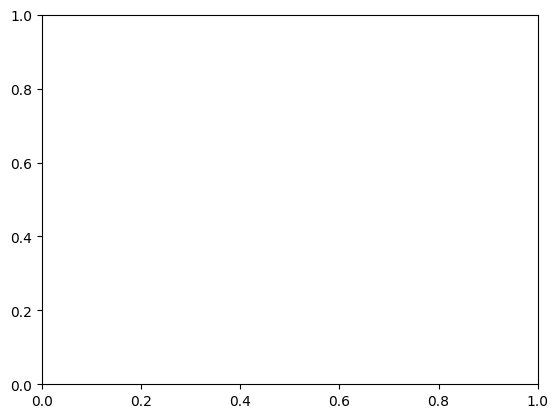

In [ ]:
df5.boxplot('facturacion',rot=90)

In [ ]:
df4.boxplot('INGRPER',rot=90)

NameError: name 'df4' is not defined

In [ ]:
df4.boxplot(column=['INGRPER'],by='Cat_SEXO', figsize=(12,6), return_type='axes')

NameError: name 'df4' is not defined

In [ ]:
sns.boxplot(x='Cat_SEXO', y='INGRPER', data=df4)
plt.title('Ingresos personales seg√∫n por Sexo')
plt.suptitle('BoxPlot')
plt.xlabel('Sexo')
plt.ylabel('Ingreso Personal')

NameError: name 'df4' is not defined

## **G.2.**  Violin.

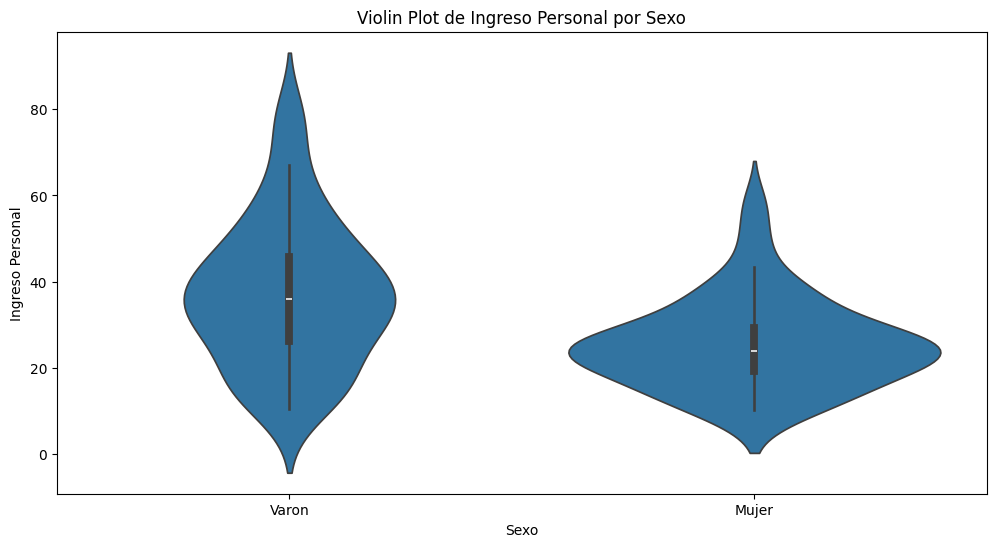

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Cat_SEXO', y='INGRPER', data=df4)
plt.title('Ingresos personales seg√∫n por Sexo')
plt.suptitle('ViolinPlot')
plt.xlabel('Sexo')
plt.ylabel('Ingreso Personal')

## **G.3.**  Histograma.

Text(0, 0.5, 'Densidad')

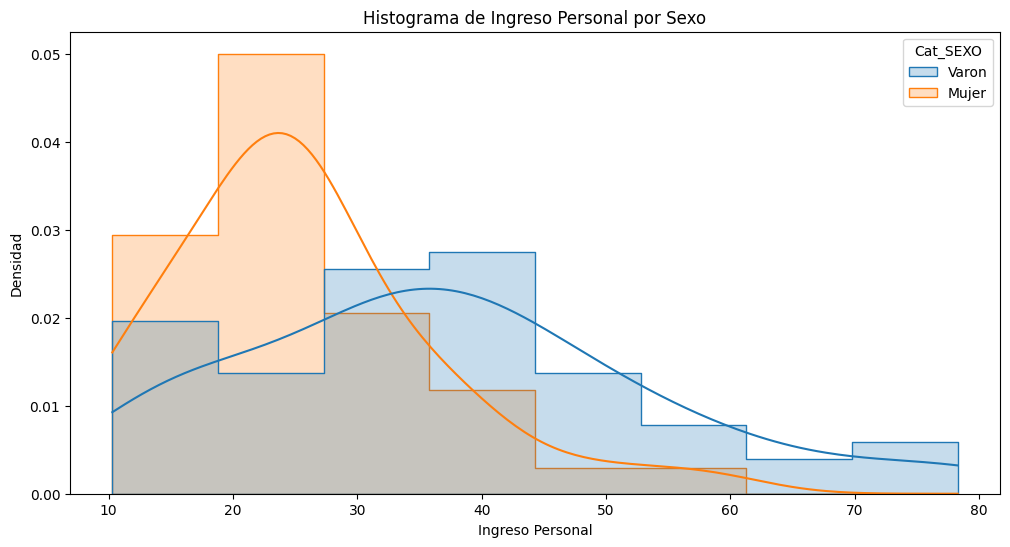

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df4, x='INGRPER', hue='Cat_SEXO', kde=True, element="step", stat="density", common_norm=False)
plt.title('Histograma de Ingreso Personal por Sexo')
plt.xlabel('Ingreso Personal')
plt.ylabel('Densidad')

## **G.4.** Densidad Kendall.

Text(0, 0.5, 'Densidad')

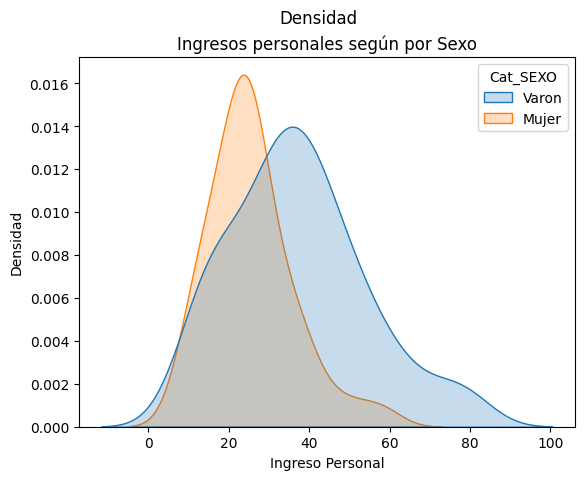

In [ ]:
sns.kdeplot(data=df4, x='INGRPER', hue='Cat_SEXO', fill=True)
plt.title('Ingresos personales seg√∫n por Sexo')
plt.suptitle('Densidad Kendall')
plt.xlabel('Ingreso Personal')
plt.ylabel('Densidad')

# **H.** EMPAREJAMIENTO DE BASES DE DATOS.

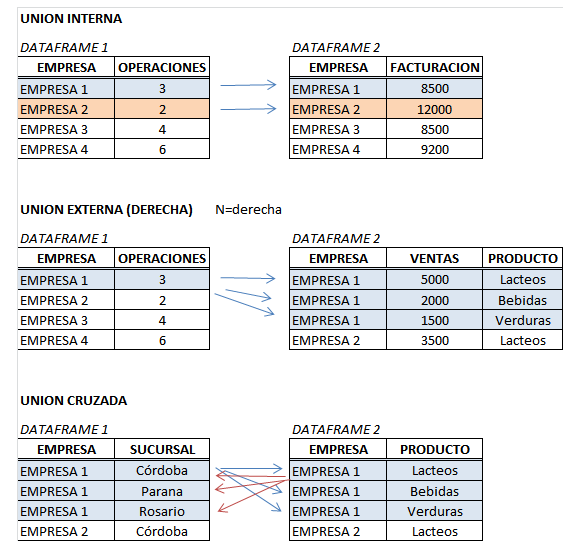

## **H.1.**  Union Interna.

**Modulo** "*merge*"

In [ ]:
df5

anio  mes mes-anio     provincia  \
0      2019    1   ene-19  BUENOS AIRES   
1      2019    1   ene-19  BUENOS AIRES   
2      2019    1   ene-19  BUENOS AIRES   
3      2019    1   ene-19  BUENOS AIRES   
4      2019    1   ene-19  BUENOS AIRES   
...     ...  ...      ...           ...   
19583  2022    2   feb-22       TUCUMAN   
19584  2022    2   feb-22       TUCUMAN   
19585  2022    2   feb-22       TUCUMAN   
19586  2022    2   feb-22       TUCUMAN   
19587  2022    2   feb-22       TUCUMAN   

                                               rubro A12     facturacion  
0                                               Anteojos     30,878,823   
1                                  Art√≠culos de Librer√≠a      4,657,723   
2                                             Balnearios      5,839,079   
3                                             Bicicletas     20,645,150   
4                                Calzado y Marroquiner√≠a    229,075,801   
...                                                  ...             ...  
19583                                         Perfumeria       6,809,876  
19584                      Servicios de cuidado personal         590,783  
19585           Servicios de preparacion para el deporte         791,256  
19586  Servicios tecnicos de electronica y electrodom...       2,197,028  
19587                                            Turismo      13,333,075  

[19588 rows x 6 columns]

In [ ]:
df6 = pd.read_excel("/content/drive/MyDrive/08_ ICD con Python /Unidad 2: Base de datos/ahora12_operaciones.xlsx")
df6

anio  mes   mes-anio     provincia  \
0      2019    1 2019-01-01  BUENOS AIRES   
1      2019    1 2019-01-01  BUENOS AIRES   
2      2019    1 2019-01-01  BUENOS AIRES   
3      2019    1 2019-01-01  BUENOS AIRES   
4      2019    1 2019-01-01  BUENOS AIRES   
...     ...  ...        ...           ...   
19583  2022    2 2022-02-01       TUCUMAN   
19584  2022    2 2022-02-01       TUCUMAN   
19585  2022    2 2022-02-01       TUCUMAN   
19586  2022    2 2022-02-01       TUCUMAN   
19587  2022    2 2022-02-01       TUCUMAN   

                                               rubro A12  operaciones  
0                                               Anteojos         8165  
1                                  Art√≠culos de Librer√≠a         1096  
2                                             Balnearios         1018  
3                                             Bicicletas         1429  
4                                Calzado y Marroquiner√≠a       122273  
...                                                  ...          ...  
19583                                         Perfumeria      6809876  
19584                      Servicios de cuidado personal       590783  
19585           Servicios de preparacion para el deporte       791256  
19586  Servicios tecnicos de electronica y electrodom...      2197028  
19587                                            Turismo     13333075  

[19588 rows x 6 columns]

In [ ]:
df5_df6 = pd.merge(left=df5,right=df6, left_on=['mes-anio','provincia','rubro A12'], right_on=['mes-anio','provincia','rubro A12'] )
#df5_df6

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'mes-anio'. If you wish to proceed you should use pd.concat

Empty DataFrame
Columns: [anio_x, mes_x, mes-anio, provincia, rubro A12, facturacion, anio_y, mes_y, operaciones]
Index: []

## **H.2.**  Union Izquierda.

In [ ]:
#df6_df7 = pd.merge(left=df5,right=df6, , how='left', left_on=['mes-anio','provincia','rubro A12'], right_on=['mes-anio','provincia','rubro A12'] )
#df6_df7

In [ ]:
#df6_df7[ pd.isnull(df6_df7.genus) ]

# **I.** CODIFICACION DE VARIABLES.

In [ ]:
df5_df6['provincia'].unique()

array(['BUENOS AIRES', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CIUDAD AUTONOMA DE BUENOS AIRES', 'CORDOBA', 'CORRIENTES',
       'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA', 'LA RIOJA',
       'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA', 'SAN JUAN',
       'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO',
       'TIERRA DEL FUEGO', 'TUCUMAN', 'CUIDAD AUTONOMA DE BUENOS AIRES',
       'SALTA ', 'SAN JUAN '], dtype=object)

## **I.1.**  Agrupar variables numericas en categorias.

**Modulo** "*math*"

In [ ]:
import math

In [ ]:
df5_df6.describe (). apply (lambda s: s.apply (lambda x: format (x, 'f')))

anio_x         mes_x      mes-anio         Facturacion  \
count  19386.000000  19386.000000  19386.000000        19386.000000   
mean    2020.222067      6.456412             f    104746879.526153   
min     2019.000000      1.000000             f            1.000000   
25%     2019.000000      3.000000             f       824119.000000   
50%     2020.000000      7.000000             f      5095056.500000   
75%     2021.000000     10.000000             f     33578482.750000   
max     2022.000000     12.000000             f  19050140203.000000   
std        0.885879      3.555200           nan    577758304.453136   

             anio_y         mes_y         operaciones  
count  19386.000000  19386.000000        19386.000000  
mean    2020.222067      6.456412      3791501.551016  
min     2019.000000      1.000000            1.000000  
25%     2019.000000      3.000000           83.000000  
50%     2020.000000      7.000000          545.000000  
75%     2021.000000     10.000000         3443.750000  
max     2022.000000     12.000000  11836140376.000000  
std        0.885879      3.555200    135072746.979234

In [ ]:
valores = [-math.inf,5000000, 15000000, 30000000, 45000000, math.inf]

In [ ]:
categorias = ["Muy Baja", "Baja", "Regular", "Alta", "Muy Alta"]

**Metodo** "*cut*"

In [ ]:
df5_df6['Facturacion_cat']=pd.cut(x=df5_df6['Facturacion'],bins=valores, labels=categorias)

In [ ]:
df5_df6['Facturacion_cat'].unique()

['Alta', 'Muy Baja', 'Baja', 'Regular', 'Muy Alta']
Categories (5, object): ['Muy Baja' < 'Baja' < 'Regular' < 'Alta' < 'Muy Alta']

## **I.2.**  Reagrupar categorias.

**Metodo** "*replace*"

In [ ]:
df5_df6['Facturacion_cat'].replace({'Muy Baja': "Baja", 'Baja': "Baja", 'Regular': "Media", 'Alta': "Alta", 'Muy Alta': "Alta"}, inplace=True)

In [ ]:
df5_df6['Facturacion_cat'].unique()

['Alta', 'Baja', 'Media']
Categories (3, object): ['Baja' < 'Media' < 'Alta']

# **J.** ESTRUCTURAS CONDICIONALES.

## **J.1.**  Condiciones.

In [ ]:
df5.info()

In [ ]:
df5['Facturacion']

0         30878823
1          4657723
2          5839079
3         20645150
4        229075801
           ...    
19583      6809876
19584       590783
19585       791256
19586      2197028
19587     13333075
Name: Facturacion, Length: 19588, dtype: int64

**Metodo** "*where*"

In [ ]:
df5_df6['Facturacion_cat2']=np.where(df5_df6['Facturacion']<30000000, 'Baja', 'Alta')

In [ ]:
df5_df6.head(5)

anio_x  mes_x   mes-anio     provincia                rubro A12  \
0    2019      1 2019-01-01  BUENOS AIRES                 Anteojos   
1    2019      1 2019-01-01  BUENOS AIRES    Art√≠culos de Librer√≠a   
2    2019      1 2019-01-01  BUENOS AIRES               Balnearios   
3    2019      1 2019-01-01  BUENOS AIRES               Bicicletas   
4    2019      1 2019-01-01  BUENOS AIRES  Calzado y Marroquiner√≠a   

   Facturacion  anio_y  mes_y  operaciones Facturacion_cat Facturacion_cat2  
0     30878823    2019      1         8165            Alta             Alta  
1      4657723    2019      1         1096            Baja             Baja  
2      5839079    2019      1         1018            Baja             Baja  
3     20645150    2019      1         1429           Media             Baja  
4    229075801    2019      1       122273            Alta             Alta

In [ ]:
from IPython.display import display, HTML
display(HTML('<h2 style="color:yellow">OPERADORES</h2>'))

'**or**'<br> ("**|**")

In [ ]:
df5_df6['VolTrans']= np.where((df5_df6['Facturacion']<30000000)|(df5_df6['operaciones']<8000),'Baja','Alta')

In [ ]:
df5_df6.head(5)

anio_x  mes_x   mes-anio     provincia                rubro A12  \
0    2019      1 2019-01-01  BUENOS AIRES                 Anteojos   
1    2019      1 2019-01-01  BUENOS AIRES    Art√≠culos de Librer√≠a   
2    2019      1 2019-01-01  BUENOS AIRES               Balnearios   
3    2019      1 2019-01-01  BUENOS AIRES               Bicicletas   
4    2019      1 2019-01-01  BUENOS AIRES  Calzado y Marroquiner√≠a   

   Facturacion  anio_y  mes_y  operaciones Facturacion_cat Facturacion_cat2  \
0     30878823    2019      1         8165            Alta             Alta   
1      4657723    2019      1         1096            Baja             Baja   
2      5839079    2019      1         1018            Baja             Baja   
3     20645150    2019      1         1429           Media             Baja   
4    229075801    2019      1       122273            Alta             Alta   

  VolTrans  
0     Alta  
1     Baja  
2     Baja  
3     Baja  
4     Alta

'**and**'<br> ("**&**")

In [ ]:
#np.where((df5_df6['Facturacion']<30000000)&(df5_df6['operaciones']<8000),'Baja','Alta')

array(['Alta', 'Baja', 'Baja', ..., 'Alta', 'Alta', 'Alta'], dtype='<U4')

In [ ]:
from IPython.display import display, HTML
display(HTML('<h2 style="color:yellow">CONDICIONES SIMULTANEAS SOBRE LISTA</h2>'))

In [ ]:
vars=['Facturacion','operaciones']

In [ ]:
vars

['Facturacion', 'operaciones']

In [ ]:
df5_df6['VolTrans2']=np.where((df5_df6[vars]<1500).any(axis=1),'Baja','Alta')

## **J.2.**  Filtros.

**Metodo** "*select*"

In [ ]:
condicion = [
             (df5_df6['VolTrans']=='Alta')&(df5_df6['provincia']=='CORDOBA')&(df5_df6['anio_x']<=2019),
             (df5_df6['VolTrans']=='Baja')&(df5_df6['provincia']!='CORDOBA')&(df5_df6['anio_x']>2019)
]
opciones = ['seleccionado','no_seleccionado']
df5_df6['filtro'] = np.select(condicion, opciones)

In [ ]:
df5_df6.head(90)

anio_x  mes_x   mes-anio     provincia                rubro A12  \
0     2019      1 2019-01-01  BUENOS AIRES                 Anteojos   
1     2019      1 2019-01-01  BUENOS AIRES    Art√≠culos de Librer√≠a   
2     2019      1 2019-01-01  BUENOS AIRES               Balnearios   
3     2019      1 2019-01-01  BUENOS AIRES               Bicicletas   
4     2019      1 2019-01-01  BUENOS AIRES  Calzado y Marroquiner√≠a   
..     ...    ...        ...           ...                      ...   
85    2019      1 2019-01-01       CORDOBA  Calzado y Marroquiner√≠a   
86    2019      1 2019-01-01       CORDOBA                Colchones   
87    2019      1 2019-01-01       CORDOBA        Electrodom√©sticos   
88    2019      1 2019-01-01       CORDOBA             Indumentaria   
89    2019      1 2019-01-01       CORDOBA   Instrumentos musicales   

    Facturacion  anio_y  mes_y  operaciones Facturacion_cat Facturacion_cat2  \
0      30878823    2019      1         8165            Alta             Alta   
1       4657723    2019      1         1096            Baja             Baja   
2       5839079    2019      1         1018            Baja             Baja   
3      20645150    2019      1         1429           Media             Baja   
4     229075801    2019      1       122273            Alta             Alta   
..          ...     ...    ...          ...             ...              ...   
85     54696992    2019      1        27069            Alta             Alta   
86     15383306    2019      1         1229           Media             Baja   
87    113910312    2019      1        10495            Alta             Alta   
88    217350590    2019      1        98061            Alta             Alta   
89      1847072    2019      1          196            Baja             Baja   

   VolTrans VolTrans2        filtro  
0      Alta      Alta             0  
1      Baja      Baja             0  
2      Baja      Baja             0  
3      Baja      Baja             0  
4      Alta      Alta             0  
..      ...       ...           ...  
85     Alta      Alta  seleccionado  
86     Baja      Baja             0  
87     Alta      Alta  seleccionado  
88     Alta      Alta  seleccionado  
89     Baja      Baja             0  

[90 rows x 14 columns]

Booleano -> Lista

In [ ]:
print(df5_df6['filtro']=='seleccionado')

0        False
1        False
2        False
3        False
4        False
         ...  
19381    False
19382    False
19383    False
19384    False
19385    False
Name: filtro, Length: 19386, dtype: bool


In [ ]:
df5_df6[(df5_df6['filtro']=='seleccionado')]

anio_x  mes_x   mes-anio provincia                        rubro A12  \
85      2019      1 2019-01-01   CORDOBA          Calzado y Marroquiner√≠a   
87      2019      1 2019-01-01   CORDOBA                Electrodom√©sticos   
88      2019      1 2019-01-01   CORDOBA                     Indumentaria   
92      2019      1 2019-01-01   CORDOBA  Materiales para la construcci√≥n   
473     2019      2 2019-02-01   CORDOBA          Calzado y Marroquiner√≠a   
...      ...    ...        ...       ...                              ...   
4599    2019     12 2019-12-01   CORDOBA        Juguetes y Juegos de mesa   
4601    2019     12 2019-12-01   CORDOBA  Materiales para la construcci√≥n   
4602    2019     12 2019-12-01   CORDOBA                     Motocicletas   
4604    2019     12 2019-12-01   CORDOBA                          Muebles   
4607    2019     12 2019-12-01   CORDOBA                   Sin clasificar   

      Facturacion  anio_y  mes_y  operaciones Facturacion_cat  \
85       54696992    2019      1        27069            Alta   
87      113910312    2019      1        10495            Alta   
88      217350590    2019      1        98061            Alta   
92      108872826    2019      1        10498            Alta   
473      57990924    2019      2        27518            Alta   
...           ...     ...    ...          ...             ...   
4599     65075602    2019     12        23008            Alta   
4601    555444669    2019     12        51221            Alta   
4602    367104526    2019     12        21299            Alta   
4604    119661887    2019     12         8697            Alta   
4607     74614344    2019     12        13799            Alta   

     Facturacion_cat2 VolTrans VolTrans2        filtro  
85               Alta     Alta      Alta  seleccionado  
87               Alta     Alta      Alta  seleccionado  
88               Alta     Alta      Alta  seleccionado  
92               Alta     Alta      Alta  seleccionado  
473              Alta     Alta      Alta  seleccionado  
...               ...      ...       ...           ...  
4599             Alta     Alta      Alta  seleccionado  
4601             Alta     Alta      Alta  seleccionado  
4602             Alta     Alta      Alta  seleccionado  
4604             Alta     Alta      Alta  seleccionado  
4607             Alta     Alta      Alta  seleccionado  

[67 rows x 14 columns]

In [ ]:
from IPython.display import display, HTML
display(HTML('<h2 style="color:yellow">Ejemplo de Filtro</h2>'))

In [ ]:
condicion = [
             (df5_df6['rubro A12']=='Electrodom√©sticos')&(df5_df6['provincia']=='CORDOBA')&(df5_df6['anio_x']<=2019),
             (df5_df6['rubro A12']!='Electrodom√©sticos')&(df5_df6['provincia']!='CORDOBA')&(df5_df6['anio_x']<2019)
]
opciones = ['seleccionado','no_seleccionado']
df5_df6['filtro2'] = np.select(condicion, opciones)

In [ ]:
cba_elect=df5_df6[(df5_df6['filtro2']=='seleccionado')]
cba_elect

anio_x  mes_x   mes-anio provincia          rubro A12  Facturacion  \
87      2019      1 2019-01-01   CORDOBA  Electrodom√©sticos    113910312   
475     2019      2 2019-02-01   CORDOBA  Electrodom√©sticos    103079886   
865     2019      3 2019-03-01   CORDOBA  Electrodom√©sticos    140615934   
1251    2019      4 2019-04-01   CORDOBA  Electrodom√©sticos    124670579   
1627    2019      5 2019-05-01   CORDOBA  Electrodom√©sticos    129195011   
2026    2019      6 2019-06-01   CORDOBA  Electrodom√©sticos    439311096   
2433    2019      7 2019-07-01   CORDOBA  Electrodom√©sticos    586040132   
2858    2019      8 2019-08-01   CORDOBA  Electrodom√©sticos    657943311   
3293    2019      9 2019-09-01   CORDOBA  Electrodom√©sticos    592893184   
3721    2019     10 2019-10-01   CORDOBA  Electrodom√©sticos   1249734520   
4151    2019     11 2019-11-01   CORDOBA  Electrodom√©sticos    678610631   
4596    2019     12 2019-12-01   CORDOBA  Electrodom√©sticos    983112475   

      anio_y  mes_y  operaciones Facturacion_cat Facturacion_cat2 VolTrans  \
87      2019      1        10495            Alta             Alta     Alta   
475     2019      2         9310            Alta             Alta     Alta   
865     2019      3        12237            Alta             Alta     Alta   
1251    2019      4        10539            Alta             Alta     Alta   
1627    2019      5        11255            Alta             Alta     Alta   
2026    2019      6        33437            Alta             Alta     Alta   
2433    2019      7        46315            Alta             Alta     Alta   
2858    2019      8        48676            Alta             Alta     Alta   
3293    2019      9        39690            Alta             Alta     Alta   
3721    2019     10        76737            Alta             Alta     Alta   
4151    2019     11        45666            Alta             Alta     Alta   
4596    2019     12        77280            Alta             Alta     Alta   

     VolTrans2        filtro       filtro2  
87        Alta  seleccionado  seleccionado  
475       Alta  seleccionado  seleccionado  
865       Alta  seleccionado  seleccionado  
1251      Alta  seleccionado  seleccionado  
1627      Alta  seleccionado  seleccionado  
2026      Alta  seleccionado  seleccionado  
2433      Alta  seleccionado  seleccionado  
2858      Alta  seleccionado  seleccionado  
3293      Alta  seleccionado  seleccionado  
3721      Alta  seleccionado  seleccionado  
4151      Alta  seleccionado  seleccionado  
4596      Alta  seleccionado  seleccionado

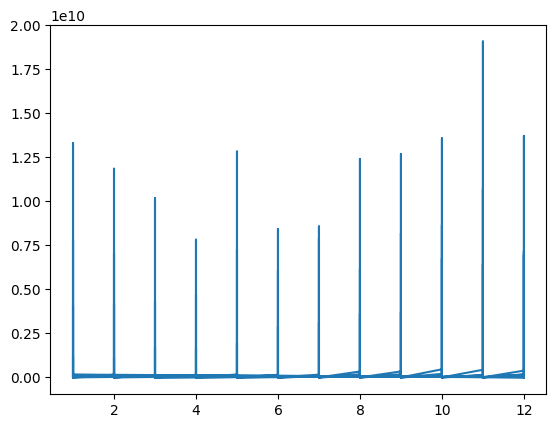

In [ ]:
plt.plot(df5_df6['mes_x'], df5_df6['Facturacion'])

# **K.** CALCULOS DE NUEVAS VARIABLES.

In [ ]:
df5['mes-anio']

In [ ]:
df5['provincia']

## **K.1.**  Concatenacion.

In [ ]:
ID = df5['mes-anio'] + df5['provincia']

In [ ]:
ID = str(df5['mes-anio']) + df5['provincia']

In [ ]:
ID

In [ ]:
ID[1]

**funcion** "*map*"

In [ ]:
ID2 = df5['mes-anio'].map(str) + df5['provincia']

In [ ]:
ID2

In [ ]:
df5['ID'] = ID2

In [ ]:
df5.info()

## **K.2.**  Nueva variable a partir del calculo de existentes.

'Indice1' es el cociente entre la facturacion y el numero de operaciones realizadas en cada rubro, de cada provincia, en cada mes registrado.

In [ ]:
df5_df6['Facturacion']/df5_df6['operaciones']

In [ ]:
df5_df6['indice1']= df5_df6['Facturacion']/df5_df6['operaciones']

# **L.** GUARDAR BASE DE DATOS.

In [ ]:
df5_df6

## **L.1.**  Guardar como excel.

In [ ]:
df5_df6.to_excel("/content/drive/MyDrive/Colab Notebooks/Bases de Datos/ahora12.xlsx")

## **L.2.**  Guardar como csv.

In [ ]:
df5_df6.to_csv("/content/drive/MyDrive/Colab Notebooks/Bases de Datos/ahora12.csv", sep=";")

# Gesti√≥n de Datos

La gesti√≥n de datos comienza con la identificaci√≥n clara del problema a resolver y la evaluaci√≥n de
la disponibilidad y calidad de los datos. Una vez que se cuentan con los datos necesarios, es
importante clasificarlos adecuadamente (estructurados, no estructurados, semiestructurados) y
aplicar las herramientas y t√©cnicas correspondientes para su an√°lisis. El modelo relacional sigue
siendo uno de los enfoques m√°s comunes, pero el manejo de datos no estructurados y
semiestructurados tambi√©n juega un papel importante en el an√°lisis avanzado.

## 1. Proceso Inicial de Identificaci√≥n y Evaluaci√≥n del Problema:
* Investigar el problema: Antes de trabajar con datos, es crucial asegurarse de que el
problema a resolver es realmente un problema y determinar si se puede abordar con
datos.
* Preguntas clave:
  * ¬øEl problema ha sido abordado antes?
  * ¬øExisten datos disponibles?
  * ¬øQu√© tipo de datos necesitamos?
  * ¬øQu√© fuentes de datos est√°n accesibles?
  * ¬øCu√°nta calidad tienen los datos disponibles? ¬øQui√©n es el propietario de los
datos?
* Si no hay datos disponibles:
  * ¬øEs necesario recolectarlos?
  * ¬øDe qu√© fuentes? ¬øC√≥mo se recoger√°n?
  * ¬øCu√°ntos datos son necesarios para el an√°lisis? ¬øSe utilizar√°n muestras?
  * ¬øLas fuentes de datos son seguras y confiables?

## 2. Estructura de los Datos:
* Datos como registros: Los datos son conjuntos de registros donde cada registro tiene
asociado un conjunto de caracter√≠sticas. Las caracter√≠sticas se pueden asociar de
diferentes maneras.
* Formato de almacenamiento: Estos registros se almacenan en diferentes formatos seg√∫n
la necesidad y el tipo de datos.
* Base de Datos: Un conjunto de datos almacenados de manera sistem√°tica. Esto puede
incluir bases de datos relacionales o no relacionales.

## 3. Modelos de Bases de Datos:
* Modelo Relacional: Es uno de los modelos m√°s comunes para representar datos. En este
modelo, los datos se visualizan en tablas con filas y columnas, y las relaciones entre las
diferentes tablas se describen mediante claves primarias y for√°neas.

# Tipos de datos (estructurados y no estructurados) y su tratamiento

## Datos Estructurados:
**Descripci√≥n:** Son aquellos organizados en un formato predefinido y fijo, como tablas de bases de
datos relacionales. Los datos se almacenan en filas y columnas con etiquetas claras, lo que facilita
su b√∫squeda, an√°lisis y procesamiento.

**Ejemplo:** Base de datos de estudiantes con columnas como ID, Nombre, Carrera, Promedio.

## Datos No Estructurados:
**Descripci√≥n:** Son aquellos datos que no siguen una organizaci√≥n predefinida. Generalmente,
incluyen texto, im√°genes, audios, videos, y otros formatos que requieren t√©cnicas avanzadas
(como inteligencia artificial, miner√≠a de datos) para su an√°lisis.

**Ejemplo:** Correos electr√≥nicos, grabaciones de clases, publicaciones en redes sociales, im√°genes
escaneadas.

## Datos Semiestructurados:
**Descripci√≥n:** Son datos que no siguen un esquema fijo como una tabla relacional, pero s√≠ tienen
una organizaci√≥n interna definida, que facilita su an√°lisis. No son tan estructurados como los datos
relacionales, pero contienen etiquetas, llaves o estructuras jer√°rquicas que ayudan a interpretar el
contenido.

**Ejemplo:** Archivos JSON, XML, datos de registros en logs de servidores, etc.

# Limpieza e integraci√≥n de datos. T√©cnicas de curaci√≥n de datos e ingenier√≠a de caracter√≠sticas (feature engineering)

La limpieza e integraci√≥n de datos son pasos fundamentales para garantizar que los datos sean
√∫tiles, precisos y consistentes antes de ser utilizados en el an√°lisis y modelado. Las t√©cnicas de
imputaci√≥n, eliminaci√≥n de duplicados, correcci√≥n de errores y tratamiento de valores at√≠picos son
fundamentales a la hora de llevar a cabo un proyecto.

Aqu√≠ est√°n algunas de las t√©cnicas clave que se utilizan en este proceso:

## 1. Eliminaci√≥n o Imputaci√≥n de Datos Faltantes
**Problema ‚Üí** Los datos incompletos son comunes en muchas bases de datos, con valores
ausentes en filas o columnas.

**Posibles Soluciones:**
* Eliminar las filas o columnas si el porcentaje de datos faltantes es alto (esto puede ser
eficiente si los datos faltantes son pocos en comparaci√≥n con el volumen total).
* Imputaci√≥n de valores utilizando La media o mediana (si los datos son num√©ricos), o
Modelos predictivos como regresi√≥n (imputaci√≥n por regresi√≥n), donde se predicen los
valores faltantes basados en las dem√°s variables.

## 2. Eliminaci√≥n de Duplicados
**Problema ‚Üí** Los datos pueden contener entradas repetidas debido a errores de recopilaci√≥n o
almacenamiento.

**Posible Soluci√≥n:**
* Identificar y eliminar las filas duplicadas para evitar sesgos o duplicaciones en los an√°lisis y
modelos.

## 3. Correcci√≥n de Errores Tipogr√°ficos o Inconsistencias
**Problema ‚Üí** En ocasiones, los datos pueden contener errores tipogr√°ficos, diferencias en
may√∫sculas/min√∫sculas, o inconsistencias en los nombres y categor√≠as.

**Posible Soluci√≥n:**
* Normalizaci√≥n de texto: Homogeneizar los datos de texto para asegurar la consistencia.
Esto incluye: Convertir todo a min√∫sculas o may√∫sculas y Corregir errores ortogr√°ficos.
Asegurar que las categor√≠as sean coherentes (por ejemplo, "Argentina", "argentina", y "ARG"
deben ser considerados como el mismo valor).

## 4. Eliminaci√≥n de Valores At√≠picos (Outliers)
**Problema ‚Üí** Los outliers pueden distorsionar los an√°lisis, afectando la precisi√≥n de los modelos.

**Posible Soluci√≥n:**
* Detectar outliers mediante m√©todos estad√≠sticos como: Desviaci√≥n est√°ndar o IQR (Rango
intercuart√≠lico): Se detectan valores fuera del rango de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
* Visualizaciones: Usar gr√°ficos como los boxplots para identificar valores at√≠picos
visualmente.

## Ingenier√≠a de Caracter√≠sticas (Feature Engineering)
La ingenier√≠a de caracter√≠sticas se refiere al proceso de transformaci√≥n de datos existentes para
crear nuevas variables que mejoren el rendimiento de los modelos de aprendizaje autom√°tico.
Algunas de sus tareas son:

Crear caracter√≠sticas m√°s representativas que ayuden a los modelos a entender mejor las
relaciones y patrones en los datos a trav√©s de la creaci√≥n de nuevas variables.
* Ejemplo: Si tenemos las variables "Precio" y "Cantidad vendida", podemos calcular
"Ingresos" como el producto de estas dos variables.

Transformar datos a trav√©s de procesos como normalizaci√≥n, codificaci√≥n de variables categ√≥ricas
o la transformaci√≥n matem√°tica.
* Normalizaci√≥n: Es el proceso de ajustar los valores de las variables para que tengan la
misma escala. Por ejemplo, transformar los ingresos para que est√©n en un rango entre 0 y
1.
* Codificaci√≥n de Variables Categ√≥ricas: Transformar variables de texto en valores
num√©ricos para que puedan ser utilizadas por los modelos. Por ejemplo, convertir las
categor√≠as "S√≠" y "No" en 1 y 0 respectivamente.
* Transformaci√≥n Matem√°tica: Aplicar funciones matem√°ticas como el logaritmo para reducir
la asimetr√≠a en distribuciones sesgadas (esto es √∫til cuando los datos tienen una gran
dispersi√≥n)

Busca la reducci√≥n de Dimensionalidad. Cuando se tienen demasiadas variables, esto puede
aumentar la complejidad del modelo y hacer que se tarde m√°s en entrenar, por lo que t√©cnicas
como el An√°lisis de Componentes Principales (PCA) permiten reducir la cantidad de
caracter√≠sticas sin perder la informaci√≥n m√°s relevante. PCA busca combinar las variables
originales en nuevas variables (componentes) que expliquen la mayor parte de la variabilidad en
los datos.

# Estandarizaci√≥n de procesos

La estandarizaci√≥n de procesos en ciencia de datos es fundamental para garantizar que los
proyectos sean manejados de manera eficiente, confiable y coherente. Esta pr√°ctica es esencial
cuando los proyectos requieren colaboraci√≥n entre diferentes equipos, integraci√≥n de m√∫ltiples
fuentes de datos y escalabilidad en los modelos de machine learning.

## Importancia de la Estandarizaci√≥n en Ciencia de Datos
La estandarizaci√≥n de procesos en ciencia de datos no solo facilita el trabajo individual de los
cient√≠ficos de datos, sino que tambi√©n beneficia a los equipos que colaboran en proyectos m√°s
grandes, permitiendo la replicabilidad, calidad y eficiencia de las soluciones. Aqu√≠ se detallan
algunos de los beneficios m√°s importantes:

* Reproducibilidad: La estandarizaci√≥n garantiza que los an√°lisis y modelos sean replicables,
es decir, que los resultados sean consistentes cuando se repiten los mismos procesos con
los mismos datos.
* Calidad de los Datos: La estandarizaci√≥n ayuda a reducir errores y asegura que los datos
sean limpios y estructurados antes de su an√°lisis. La calidad del dato es uno de los pilares
m√°s importantes para obtener resultados v√°lidos.
* Eficiencia Operativa: Optimiza el tiempo invertido en cada fase del proceso, desde la
recolecci√≥n hasta el modelado. Esto permite que los equipos se concentren en tareas de
mayor valor, como la mejora del modelo y la exploraci√≥n de nuevas variables.
* Facilita la Colaboraci√≥n: Equipos multidisciplinarios, que incluyen cient√≠ficos de datos,
ingenieros de datos, analistas y otros roles, pueden trabajar de manera m√°s coordinada y
eficiente si siguen un proceso est√°ndar.
* Automatizaci√≥n y Escalabilidad: Los procesos estandarizados permiten automatizar tareas
repetitivas y aplicar soluciones a gran escala de manera coherente, lo que es esencial
cuando los proyectos crecen en volumen o complejidad.

## Fases del Proceso de Ciencia de Datos y su Estandarizaci√≥n
La estandarizaci√≥n se aplica en todas las fases del ciclo de vida de un proyecto de ciencia de
datos, desde la recolecci√≥n de datos hasta el despliegue de los modelos en producci√≥n. Cada fase
tiene sus propios procesos y pr√°cticas que pueden beneficiarse de la estandarizaci√≥n:

### 1. Ingesta y Preprocesamiento de Datos
La ingesta de datos es el primer paso crucial. El proceso estandarizado aqu√≠ incluye:
* Definir un formato com√∫n para almacenar y procesar los datos.
* Usar herramientas de automatizaci√≥n para la ingesta de datos de diversas fuentes (bases
de datos, archivos, APIs, etc.).
* Asegurar que los datos sean limpiados y preprocesados de manera coherente (remoci√≥n
de valores faltantes, tratamiento de duplicados, etc.).

### 2. Exploraci√≥n y An√°lisis de Datos
Una vez que los datos est√°n preprocesados, la exploraci√≥n y el an√°lisis ayudan a descubrir
patrones, tendencias o relaciones:
* Estandarizaci√≥n de herramientas: Usar librer√≠as y frameworks consistentes como pandas,
numpy, matplotlib y seaborn para realizar an√°lisis exploratorios.
* Estandarizaci√≥n de procesos: Definir m√©todos para realizar an√°lisis estad√≠sticos y
visualizaci√≥n de datos (por ejemplo, correlaciones, boxplots, histogramas).

### 3. Ingenier√≠a de Caracter√≠sticas (Feature Engineering)
La ingenier√≠a de caracter√≠sticas es el proceso de crear nuevas variables que mejoren el
rendimiento de los modelos:
* Establecer m√©todos sistem√°ticos para la creaci√≥n de nuevas variables, como la conversi√≥n
de fechas en a√±os, la agregaci√≥n de datos num√©ricos o la transformaci√≥n de variables
categ√≥ricas en variables binarias.
* Usar herramientas como scikit-learn o TensorFlow que proporcionan m√©todos
estandarizados para preprocesar y transformar caracter√≠sticas.

### 4. Modelado y Evaluaci√≥n
El modelado es una de las fases m√°s cr√≠ticas, donde se aplican algoritmos de machine learning
para encontrar patrones en los datos:
* Selecci√≥n de Modelos: Estandarizar el proceso de selecci√≥n de modelos, asegurando que
se prueben varios modelos para determinar el m√°s adecuado.
* Evaluaci√≥n: Definir m√©tricas estandarizadas para evaluar el rendimiento de los modelos
(por ejemplo, precisi√≥n, recall, AUC-ROC).
* Entrenamiento y validaci√≥n: Estandarizar los procedimientos de validaci√≥n cruzada y la
divisi√≥n del conjunto de datos en entrenamiento y prueba.

### 5. Despliegue y Mantenimiento del Modelo
El despliegue se refiere a poner el modelo en producci√≥n para que se utilice en el mundo real:
* Estandarizaci√≥n del pipeline de despliegue: Definir procedimientos autom√°ticos para el
despliegue de modelos en entornos de producci√≥n, asegurando que el modelo sea
accesible de forma eficiente.
* Mantenimiento: Establecer procesos est√°ndar para el monitoreo del rendimiento del
modelo en tiempo real y la actualizaci√≥n peri√≥dica del modelo con nuevos datos.

## Herramientas para la Estandarizaci√≥n en Ciencia de Datos
Existen varias herramientas y plataformas que ayudan en la estandarizaci√≥n de procesos en
ciencia de datos, desde la recolecci√≥n y limpieza de datos hasta el despliegue y mantenimiento
del modelo:

* Jupyter Notebooks: Ideal para trabajar en un entorno interactivo donde los cient√≠ficos de datos
pueden combinar c√≥digo, visualizaciones y documentaci√≥n en un solo documento. Facilita la
reproducibilidad.
* Git y GitHub: Herramientas de control de versiones para asegurar que el c√≥digo sea gestionado de
manera eficiente y que los equipos puedan colaborar de forma efectiva.
* Pandas y Numpy: Librer√≠as de Python que proporcionan m√©todos estandarizados para el manejo
de datos estructurados y para la manipulaci√≥n matem√°tica y estad√≠stica.
* Scikit-learn: Una de las librer√≠as m√°s populares para machine learning en Python. Permite
estandarizar el proceso de modelado, desde la selecci√≥n de modelos hasta la evaluaci√≥n.
* Docker y Kubernetes: Herramientas que permiten contenerizar y orquestar el despliegue de
modelos de machine learning, facilitando la estandarizaci√≥n en el proceso de despliegue y
escalabilidad.
* Airflow: Una herramienta de automatizaci√≥n de flujos de trabajo que ayuda a estandarizar las
tareas de procesamiento de datos y el despliegue de modelos a gran escala.

# Principios en el manejo de base de datos

El manejo adecuado de bases de datos es fundamental para asegurar la integridad, seguridad,
rendimiento y escalabilidad de la informaci√≥n almacenada. A continuaci√≥n, se detallan los
principales principios que gu√≠an la gesti√≥n eficiente de bases de datos.

## Principio de Integridad
El principio de integridad se asegura de que los datos almacenados sean precisos, consistentes y
v√°lidos a lo largo del tiempo. Esto es crucial para evitar errores y mantener la fiabilidad de la base
de datos. Existen varios tipos de integridad:

* Integridad de entidad: Cada registro debe ser √∫nico y f√°cilmente identificable mediante una
clave primaria.

**Ejemplo:** En una base de datos de empleados, el campo "ID de empleado" debe ser √∫nico para
cada registro de empleado.

* Integridad referencial: Las relaciones entre tablas deben ser coherentes y gestionadas
mediante claves for√°neas.

**Ejemplo:** En una base de datos de empleados y departamentos, si un departamento es eliminado,
los empleados que pertenec√≠an a ese departamento deben ser actualizados o eliminados
correctamente para no dejar datos hu√©rfanos.

* Integridad de dominio: Cada campo debe contener solo valores v√°lidos dentro de un rango
definido.

**Ejemplo:** En una base de datos de empleados, el campo "Edad" debe contener valores num√©ricos
dentro de un rango v√°lido, como entre 18 y 100 a√±os.

## Principio de Normalizaci√≥n
La normalizaci√≥n es un proceso que busca reducir la redundancia de datos y mejorar la eficiencia
en el almacenamiento. Adem√°s, ayuda a minimizar posibles problemas cuando se insertan,
eliminan o actualizan registros en la base de datos.

* Eliminar datos duplicados: Asegura que la base de datos no contenga registros repetidos
que aumenten el tama√±o innecesariamente y generen inconsistencias.
* Minimizar las anomal√≠as: La normalizaci√≥n permite evitar problemas como la actualizaci√≥n
de datos de forma inconsistente o la inserci√≥n de datos err√≥neos.
* Flexibilidad y escalabilidad: Asegura que la base de datos se pueda expandir sin que se
generen problemas a largo plazo.

**Ejemplo:** En una base de datos de ventas, en lugar de almacenar los detalles del cliente en cada
transacci√≥n, se crean tablas separadas: Clientes (con id_cliente, nombre, direcci√≥n) y Ventas (con
id_venta, id_cliente, total). Esto evita la duplicaci√≥n de informaci√≥n y hace que la base de datos
sea m√°s eficiente.

## Principio de Seguridad de Datos
La seguridad de los datos es esencial para evitar accesos no autorizados, p√©rdida de datos y
violaciones de privacidad. Para garantizar esto, se deben aplicar diversas medidas de protecci√≥n:

* Autenticaci√≥n y autorizaci√≥n: Usar roles de usuario con privilegios espec√≠ficos (por ejemplo,
Administrador, Lectura, Escritura) para controlar qui√©n puede acceder y modificar los
datos.
* Encriptaci√≥n de datos: Los datos sensibles deben ser cifrados para garantizar que no se
puedan leer en caso de que sean interceptados.
* Control de accesos: Establecer permisos y realizar auditor√≠as peri√≥dicas para garantizar
que solo los usuarios autorizados tengan acceso a los datos y puedan realizar cambios.
* Respaldos y recuperaci√≥n: Realizar copias de seguridad peri√≥dicas de la base de datos
para asegurar que la informaci√≥n no se pierda en caso de fallos del sistema.

**Ejemplo:** En un sistema bancario, solo los empleados con privilegios de administrador pueden
modificar saldos de cuentas, mientras que los cajeros solo pueden ver y registrar transacciones.

## Principio de Rendimiento y Optimizaci√≥n
El rendimiento de la base de datos es crucial para asegurar que las consultas y operaciones se
realicen de manera eficiente. Para mejorar la velocidad y la eficiencia de las consultas, se pueden
aplicar diversas buenas pr√°cticas:

* Uso de √≠ndices: Los √≠ndices aceleran la b√∫squeda de datos, mejorando el tiempo de
respuesta de las consultas.
* Optimizaci√≥n de consultas SQL: Es recomendable evitar el uso innecesario de SELECT * y
enfocarse en seleccionar solo las columnas necesarias para reducir la carga de la
consulta.
* Implementaci√≥n de cach√©: Utilizar cach√© para almacenar resultados de consultas
frecuentes y evitar accesos repetidos a la base de datos.
* Particionamiento de tablas: Dividir tablas grandes en fragmentos (particiones) para
distribuir mejor la carga y mejorar la eficiencia de las consultas.

**Ejemplo:** Si una tienda en l√≠nea consulta frecuentemente los productos m√°s vendidos, puede
crearse un √≠ndice en la columna "ventas" para acelerar la b√∫squeda.

## Principio de Transacciones y ACID
Las transacciones son operaciones que se realizan sobre la base de datos y deben cumplir con el
conjunto de propiedades ACID (Atomicidad, Consistencia, Aislamiento y Durabilidad). Estas
propiedades garantizan que las transacciones se procesen de manera confiable.

* Atomicidad: Cada transacci√≥n debe ser tratada como una unidad indivisible. Si alguna
parte de la transacci√≥n falla, toda la transacci√≥n debe revertirse para evitar inconsistencias.
* Consistencia: La base de datos debe pasar de un estado v√°lido a otro estado v√°lido
despu√©s de una transacci√≥n.
* Aislamiento: Las transacciones concurrentes deben ejecutarse como si fueran operaciones
independientes, sin que una transacci√≥n afecte a las dem√°s.
* Durabilidad: Una vez que una transacci√≥n se confirma, sus cambios deben ser
permanentes, incluso en caso de fallos del sistema.

**Ejemplo:** En una transferencia bancaria, si el dinero se descuenta de la cuenta A pero no se
acredita en la cuenta B, la transacci√≥n se revierte para evitar inconsistencias.

## Principio de Escalabilidad y Disponibilidad
Cuando se manejan bases de datos en sistemas grandes o con altos vol√∫menes de usuarios, la
escalabilidad y la disponibilidad se convierten en aspectos cruciales para mantener un rendimiento
adecuado.

* Replicaci√≥n: Crear copias de la base de datos en varios servidores para mejorar la
disponibilidad y asegurar que los datos est√©n siempre accesibles, incluso si uno de los
servidores falla.
* Sharding: Dividir la base de datos en fragmentos m√°s peque√±os, llamados "shards", que
pueden distribuirse entre varios servidores, mejorando la gesti√≥n de grandes vol√∫menes de
datos.
* Balanceo de carga: Distribuir las consultas entre varios servidores para equilibrar la carga
y evitar que un servidor se sobrecargue.

**Ejemplo:** Empresas como Google y Facebook utilizan bases de datos distribuidas con replicaci√≥n
para soportar millones de usuarios simult√°neamente.

# Uso de Python. Librer√≠as: pandas, numpy, SciPy

Python es un lenguaje de programaci√≥n de alto nivel, interpretado y de prop√≥sito general,
conocido por su sintaxis clara y sencilla, lo que lo hace muy f√°cil de aprender, especialmente para
principiantes.

## ¬øPor qu√© se usa tanto en ciencia de datos?
Porque tiene librer√≠as muy potentes para el an√°lisis, visualizaci√≥n y modelado de datos, y permite
trabajar de forma r√°pida y sencilla con grandes vol√∫menes de informaci√≥n.

Las librer√≠as Pandas, NumPy, SciPy y Seaborn son esenciales en el an√°lisis de datos y la ciencia
de datos en Python.

## Pandas
Pandas es una de las librer√≠as m√°s populares para la manipulaci√≥n y an√°lisis de datos. Facilita el
trabajo con datos estructurados, como los que se encuentran en tablas, hojas de c√°lculo o bases
de datos. Sus estructuras de datos m√°s importantes son:

* DataFrame: Una estructura bidimensional similar a una tabla de base de datos o a una
hoja de c√°lculo, que contiene filas y columnas.
* Series: Una estructura unidimensional, similar a una lista o una columna de una tabla.

## NumPy
NumPy es una librer√≠a para realizar c√°lculos cient√≠ficos y matem√°ticos con Python. Se centra en la
eficiencia del c√°lculo mediante el uso de arreglos multidimensionales (como matrices), que
permiten trabajar con grandes vol√∫menes de datos num√©ricos de manera r√°pida.

## SciPy
SciPy es una librer√≠a que extiende las funcionalidades de NumPy. Es √∫til para resolver problemas
complejos como optimizaci√≥n, integraci√≥n num√©rica, √°lgebra lineal, estad√≠sticas, etc. SciPy utiliza
las estructuras de datos de NumPy, lo que lo hace compatible y eficiente.

## Seaborn
Seaborn es una librer√≠a de visualizaci√≥n de datos basada en Matplotlib, que facilita la creaci√≥n de
gr√°ficos estad√≠sticos complejos y est√©ticamente agradables. Seaborn proporciona una interfaz
m√°s sencilla para crear gr√°ficos como histogramas, diagramas de caja, diagramas de dispersi√≥n,
etc.